In [112]:
# Ingest the data

In [113]:
import pandas as pd 
# Pandas b/c want to import our data in the form of dataframes

In [114]:
# Now lets import the data
data=pd.read_csv(r"C:\Full Stack Data Science Masters(iNEURON)\End to End Project Intro\notebooks\data\gemstone.csv")
# In the above line we need to give the file path to our data
# We can do that by right-click on our data/file where we'll get two options:
# (i) Absolute path i.e, Copy Path for eg. C:\Full Stack Data Science Masters(iNEURON)\End to End Project Intro\gemstone.csv
# (ii) Copy Relative Path for eg. gemstone.csv


In [115]:
# Here we have to predict the price of Diamonds based on their features.
# Just like every ohter dataset, we have categorical and numerical data as well.
# First lets perform EDA.
# Here in the dataset there are a few columns that are totally irrelevant to our analysis.
# As we look around we can see that column 'id' won't be important in Model creation 
# as the column 'id' does not give us anything to analyze. So, we'll drop this column.
# Similarly lets look at other columns as well.

Introduction About the Data :
The dataset The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables (including id):

id : unique identifier of each diamond

carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.

cut : Quality of Diamond Cut

color : Color of Diamond

clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.

depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)

table : A diamond's table is the facet which can be seen when the stone is viewed face up.

x : Diamond X dimension

y : Diamond Y dimension

x : Diamond Z dimension

Target variable:

price: Price of the given Diamond.

Dataset Source Link : https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv

I have solved EDA step by step

Q. If we're going to perform the Encoding on top of the feature 'clarity' what kind of encoding should we perform ? 
Ans 
We should perform Ordinal Encoding not Nominal Encoding because the diamonds have been categorized based on the 
degree/measure of their clarity.


Now lets look at another feature 'color' and see if the color of Diamond and have an impact on its price.
Q. Which diamond is a pure one colourless or colourful ? 
Ans. Colourless
For diamonds the range of color is from D to Z. Where D is colourless and Z is Yellow.
If we want to encode these values what values should we assign to D and Z and those in b/w.
We'll assign 1 to Z b/c its of poor quality.

In [116]:
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [117]:
data.tail()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681
193572,193572,0.71,Good,E,SI2,60.8,64.0,5.73,5.71,3.48,2258


In [118]:
# Lets get 5 random samples from our data
data.sample(5)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
110128,110128,0.32,Premium,H,VS1,61.5,59.0,4.37,4.39,2.690,561
183071,183071,1.01,Very Good,H,SI1,63.2,56.0,6.38,6.34,4.010,4222
46890,46890,1.10,Ideal,G,VS1,61.0,56.0,6.65,6.69,4.070,8010
165401,165401,0.24,Ideal,E,VS1,62.4,56.0,3.96,3.98,2.496,536
19974,19974,0.31,Premium,G,VVS2,61.8,59.0,4.40,4.38,2.720,907


In [119]:
# Lets check our missing values
data.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [121]:
data=data.drop(labels=["id"],axis=1)
data.head()
# We need to provide the axis to specify if we want to remove from column or row 
# 1 means columnwise, 0 means rowwise 

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [122]:
# Lets see if we have any duplicate values or not
data.duplicated().sum()

0

In [123]:
data.shape

(193573, 10)

In [124]:
# Now that we know the shape and size of our data, we have to divide it into 
# Categorical or Numeric variables, lets see the data types
data.dtypes


carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [125]:
# Lets write a condition to obtain all 'object' datatypes(categorical features) in True/False scenario.
data.dtypes=="object"

carat      False
cut         True
color       True
clarity     True
depth      False
table      False
x          False
y          False
z          False
price      False
dtype: bool

In [126]:
# Now lets collect all the columns where we have the categorical features 
categorical_columns=data.columns[data.dtypes=="object"]
categorical_columns


Index(['cut', 'color', 'clarity'], dtype='object')

In [127]:
# Similarly now if we want numerical features 
numerical_columns=data.columns[data.dtypes!="object"]
numerical_columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [128]:
# Now lets see how we can get all the categorical features together
data[categorical_columns]

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
193568,Ideal,D,VVS2
193569,Premium,G,VVS2
193570,Very Good,F,SI1
193571,Very Good,D,SI1


In [129]:
# Similarly we can get all the categorical features together
data[numerical_columns]

,carat,depth,table,x,y,z,price
0,1.52,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,61.6,56.0,4.38,4.41,2.71,666
4,1.70,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...
193568,0.31,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,62.9,55.0,4.45,4.49,2.81,681


In [130]:
data[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [131]:
data[numerical_columns].describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [132]:
# Now lets see the values count for categorical columns
data[categorical_columns].value_counts()

cut    color  clarity
Ideal  E      VS2        5490
       G      VS2        5131
              VS1        5107
       E      SI1        4309
       F      VS2        4235
                         ... 
       J      I1            2
Fair   D      I1            2
       F      IF            1
       D      VVS1          1
Good   J      IF            1
Length: 276, dtype: int64

In [133]:
# Lets dig deeper into each single columns inside the categorical column
data[categorical_columns]["cut"].value_counts()

Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: cut, dtype: int64

In [134]:
data[categorical_columns]["clarity"].value_counts()

SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: clarity, dtype: int64

In [135]:
data[categorical_columns]["color"].value_counts()

G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: color, dtype: int64

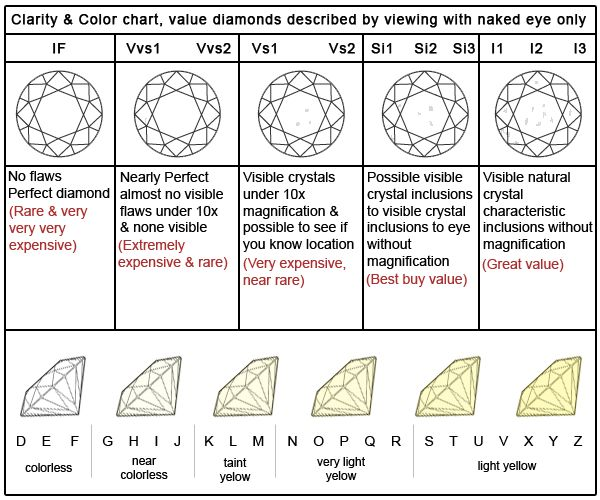

In [136]:
data[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


Now lets draw some plots for the Numeric data

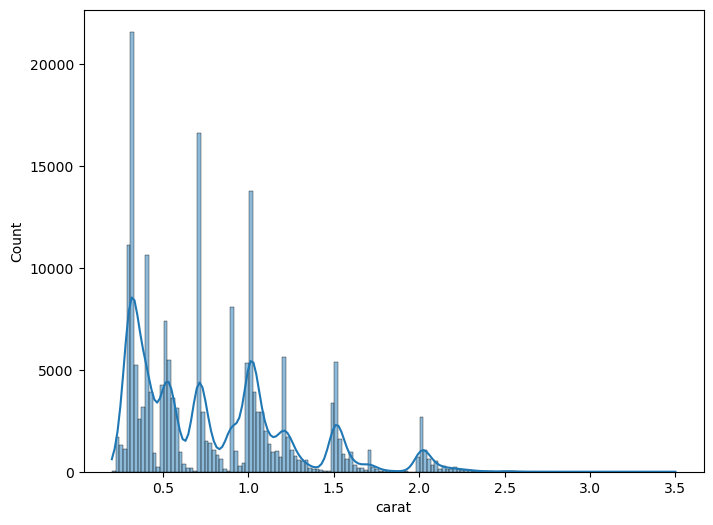

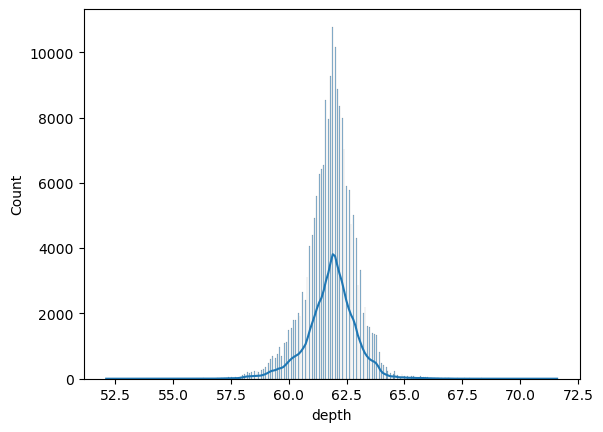

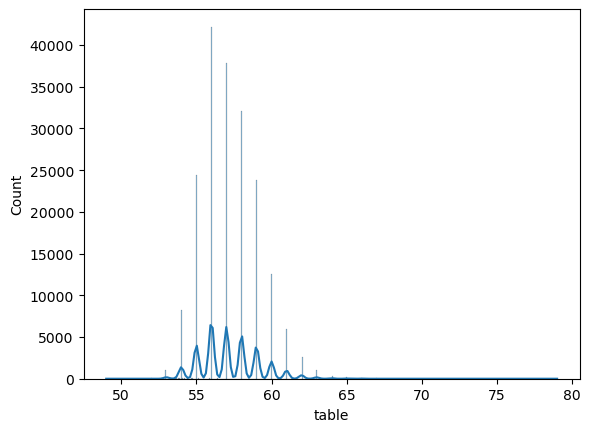

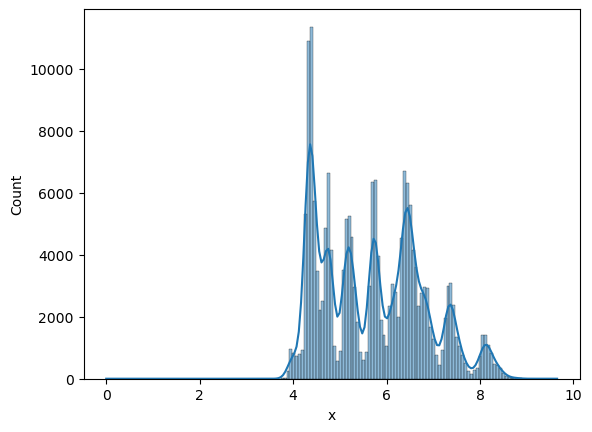

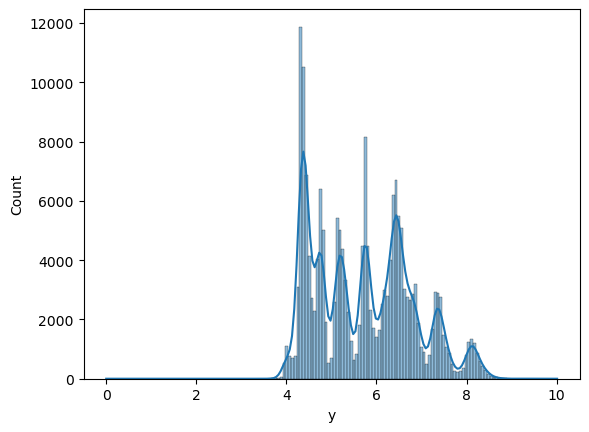

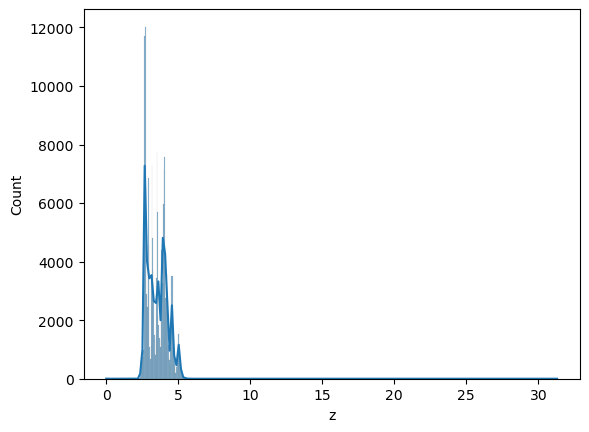

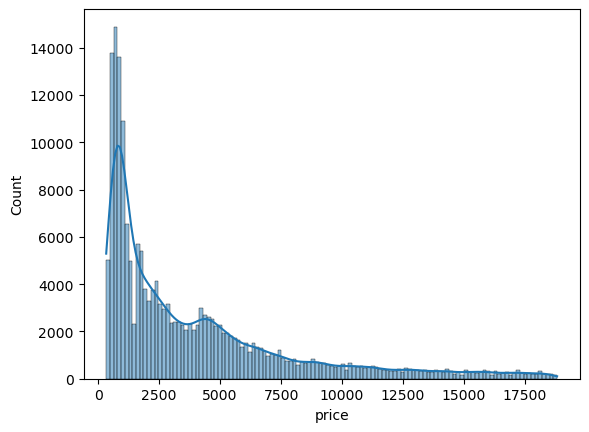

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))

for col in numerical_columns:
    sns.histplot(data=data,x=col,kde=True)
    print("\n")
    plt.show()

Now lets make a Bar plot and/or count plot w.r.t Categorical data

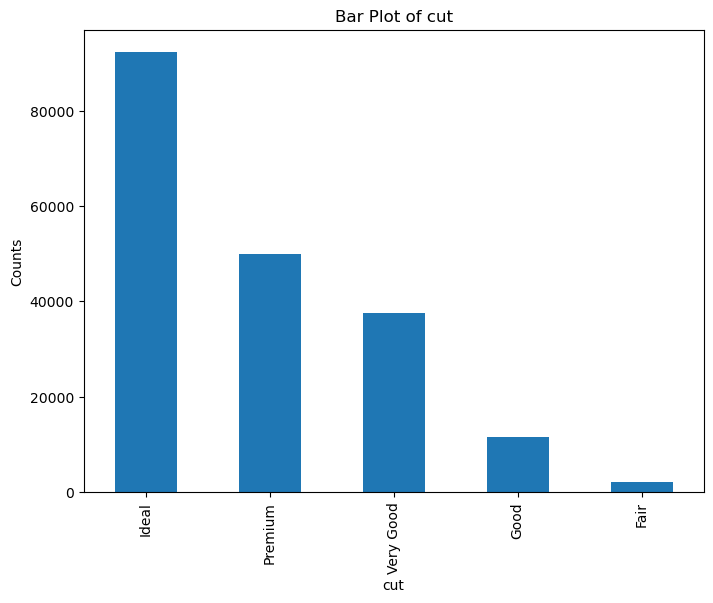

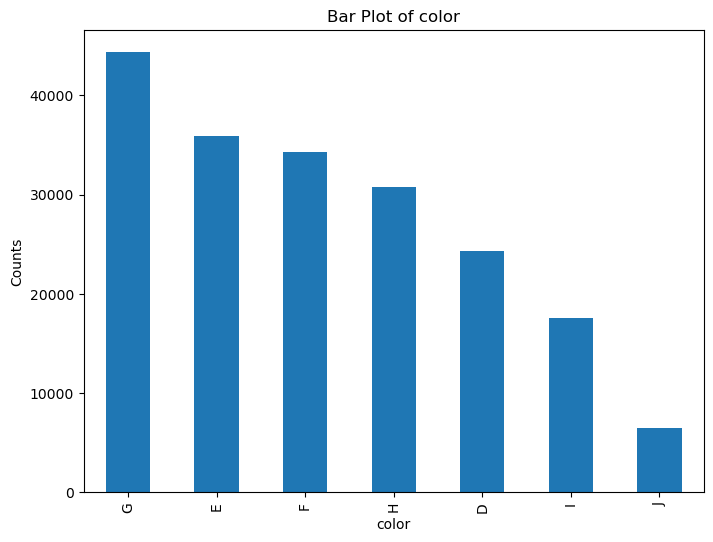

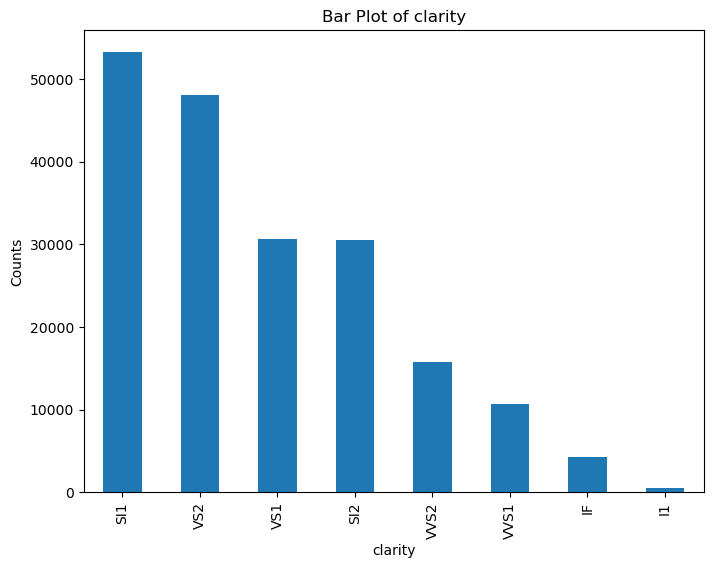

In [138]:
# Create bar plots and count plots for each categorical column
for column in categorical_columns:
    # Bar plot using matplotlib
    plt.figure(figsize=(8, 6))
    data[column].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Counts')
    plt.show()

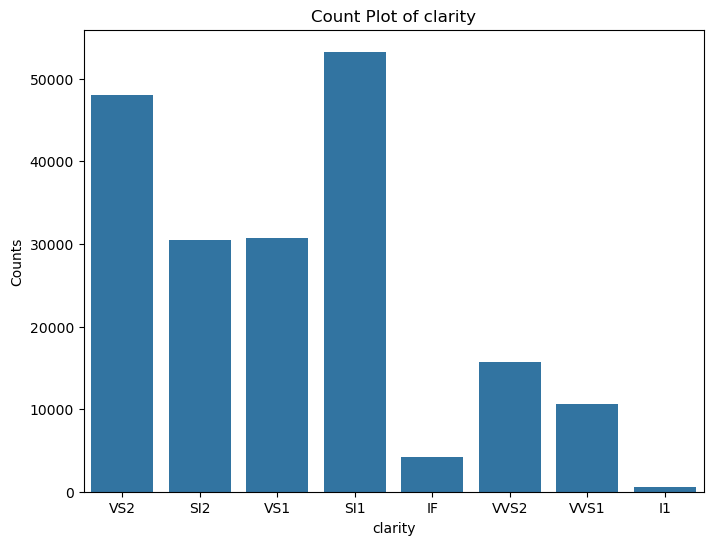

In [139]:
# Count plot using seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x=column)
plt.title(f'Count Plot of {column}')
plt.xlabel(column)
plt.ylabel('Counts')
plt.show()

If you're only getting a count plot for the 'Clarity' column and not for 'Cut' and 'Color', it suggests that the 'Cut' and 'Color' columns might not contain categorical data in your DataFrame. Double-check the data types and the content of these columns to ensure they are indeed categorical.

If the 'Cut' and 'Color' columns are supposed to contain categorical data but are not recognized as such, you can explicitly convert them to categorical data types using astype('category') before creating the plots. Here's how you can do it:

In [140]:
# Convert 'cut' and 'color' columns to categorical data type if needed
for column in ['cut', 'color']:
    if column in categorical_columns:
        data[column] = data[column].astype('category')

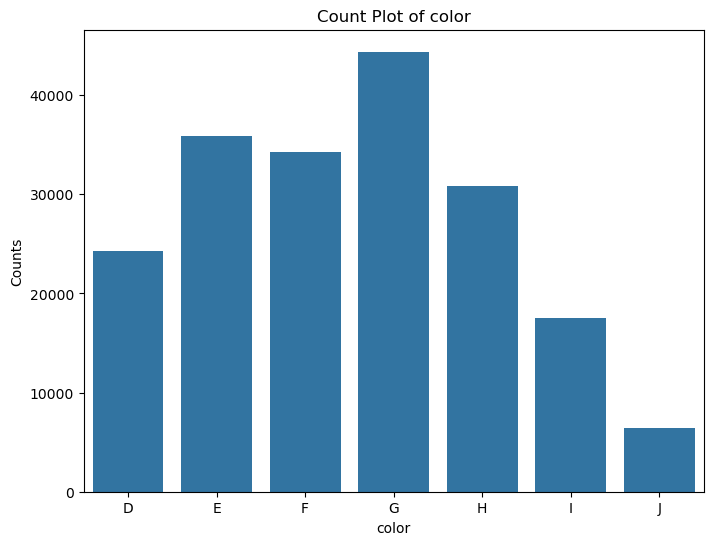

In [141]:
# Count plot using seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x=column)
plt.title(f'Count Plot of {column}')
plt.xlabel(column)
plt.ylabel('Counts')
plt.show()

Now lets check the correlation in b/w the features using Heatmap

<function matplotlib.pyplot.show(close=None, block=None)>

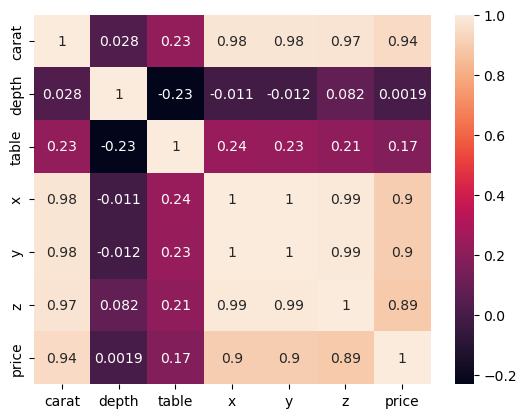

<Figure size 1200x1000 with 0 Axes>

In [142]:
sns.heatmap(data.corr(),annot=True)
plt.figure(figsize=(12, 10))
plt.show

Sometimes it may give the following error:

ValueError: could not convert string to float: 'Premium'

In that case use the numerical features only and the following code:

sns.heatmap(data[numerical_columns].corr(),annot=True)

The EDA part is mostly done now.

Lets come to the Feature Engineering part now.

In [143]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

As we can see we have different features, we need to convert our categorical features into numerical ones.
In short, we have to perform Encoding.

Lets look at the sub divisions within three categorical features.

In [144]:
data["clarity"].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [145]:
data["cut"].unique()

['Premium', 'Very Good', 'Ideal', 'Good', 'Fair']
Categories (5, object): ['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']

In [146]:
data["color"].unique()

['F', 'J', 'G', 'E', 'D', 'H', 'I']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

Lets try to Encode(or Map) these values 

Lets Encode for all three of the categorical features, do a fair bit of research and analysis before assigning each sub-category appropriate values.

Given below is called Ordinal Encoding

In [147]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map={"I1":1,"SI2":2,"SI1":3,"VS2":4,"VS1":5,"VVS2":6,"VVS1":7,"IF":8}
color_map={"D":1,"E":2,"F":3,"G":4,"H":5,"I":6,"J":7}

Now let us map the values inside cut_map into map

In [148]:
data["cut"]=data["cut"].map(cut_map)
data["cut"]

0         4
1         3
2         5
3         5
4         4
         ..
193568    5
193569    4
193570    3
193571    3
193572    2
Name: cut, Length: 193573, dtype: category
Categories (5, int64): [1, 2, 5, 4, 3]

Lets do the same for other features

In [149]:
data["clarity"]=data["clarity"].map(clarity_map)
data["color"]=data["color"].map(color_map)

In [150]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
